based on 

[H. Kervadeca, J. Bouchtibaa, C. Desrosiersa, E. Grangera, J. Dolza, I. Ben Ayed, "Boundary loss for highly unbalanced segmentation".](http://proceedings.mlr.press/v102/kervadec19a/kervadec19a.pdf)

[D. Karimi and S. E. Salcudean, "Reducing the Hausdorff Distance in Medical Image Segmentation With Convolutional Neural Networks".](https://arxiv.org/pdf/1904.10030v1.pdf)

$G$ - true mask, $S$ - predicted mask, $\Delta S = S\Delta G=(S\setminus G)\cup (G\setminus S)$ - the region of mismatch.

$G,\ S\subset\Omega$, $\Omega$ - the whole channel.

\begin{equation*}
dist_k(\partial G,\partial S) = \left(\int_{\partial G}\|y_{\partial S}(p) - p\|^k\,dp\right)^\frac{1}{k},
\end{equation*}
where $\|\cdot\|$ is Euclidian norm (could choose a different one). $y_{\partial S}(p)$ - the closest point on $\partial S$ along the normal vector $n_p$ to $\partial G$. 

$D_G(q)=dist(q,\partial G)= \inf_{x\in \partial G}\|q-x\|$ - distance from the point $q$ to $\partial G$. 

Parametrizing the segment $[p,y_{\partial S}(p)]$ 
\begin{cases}
q = r(\lambda): = p + \lambda (y_{\partial S}(p) - p),\ \lambda \in [0,1],\\
dq = \|r'(\lambda)\|\,d\lambda = \|y_{\partial S}(p) - p\|d\lambda,
\end{cases}
we get

\begin{multline*}
\int_p^{y_{\partial_S}(p)}D^k_G(q) dq = \int_p^{y_{\partial_S}(p)}\|q-p\|^k dq =
\int_0^1\lambda^k \|p-y_{\partial S}(p)\|^k \|p-y_{\partial S}(p)\| d\lambda = \frac{1}{k+1}\|p-y_{\partial S}(p)\|^{k+1}.
\end{multline*}


We have
\begin{multline*}
(dist_k(\partial G, \partial S))^k = \int_{\partial G}\|p - y_{\partial_S}(p)\|^k\,dp = k\int_{\partial G}\int_p^{y_{\partial_S}(p)}D^{k-1}_G(q)\,dq\,dp =\\
 |iterated\ to\ double\ integral|\leq k\int_{\Delta S}D^{k-1}_G(x)\,dx.
\end{multline*}

<b>Rem 1</b> Actually, the above transition from iterated integral to double integral is a neat point. The funny thing is that the difference between these integrals depends on the smoothness of the bdry $G$. They seem to coincide for smooth $G$ but not in general case. The sign of inequality and how different those integrals could be is explained in the picture below

[![Iterated vs Double Integral](https://raw.githubusercontent.com/antonsavostianov/bdry_loss/blob/main/iter_vs_double.jpg)](https://github.com/antonsavostianov/bdry_loss)

The loss that we implement corresponds to the double integral. And the good news is that, as seen from the picture, the double integral is more appropriate for our purposes =) With some abuse of notations, from now on, our $dist_k(\partial G,\partial S)$ refers to the double integral, that is 
\begin{equation*}
(dist_k(\partial G, \partial S))^k = k\int_{\Delta S}D^{k-1}_G(x)\,dx.
\end{equation*}

<b> Rem 2</b> From just obtained formula it is clear that $dist_1(\partial G,\partial S)=|\Delta S|$.

Let us rewrite the above formula via integral over the whole region $\Omega$
\begin{multline*}
(dist_k(\partial G, \partial S))^k = k\left(\int_{S\setminus G}D^{k-1}_G(x)\,dx+\int_{G\setminus S}D^{k-1}_G(x)\,dx\right)=\\ 
k\left(\int_{S\setminus G}D^{k-1}_G(x)\,dx-\int_{S\cap G}D^{k-1}_G(x)\,dx\right)+k\left(\int_{S\cap G}D^{k-1}_G(x)\,dx+\int_{G\setminus S}D^{k-1}_G(x)\,dx\right)=\\
k\left(\int_{S\setminus G}D^{k-1}_G(x)\,dx-\int_{S\cap G}D^{k-1}_G(x)\,dx\right)-k\left(-\int_{S\cap G}D^{k-1}_G(x)\,dx-\int_{G\setminus S}D^{k-1}_G(x)\,dx\right).
\end{multline*}

Introducing the function $\phi_G(x)$ (can be precomputed)
\begin{equation*}
\phi_G(x) =
\begin{cases}
kD^{k-1}_G(x),\ x\notin G,\\
-kD^{k-1}_G(x),\ x\in G,
\end{cases}
\end{equation*}

we find
\begin{multline*}
(dist_k(\partial G, \partial S))^k = \int_S\phi_G(x)\,dx - \int_G\phi_G(x)\,dx =\\ \int_\Omega \phi_G(x)1_S(x)\,dx - \int_\Omega \phi_G(x)1_G(x)\,dx= \int_\Omega\phi_G(x)(1_S(x)-1_G(x))\,dx, 
\end{multline*}

that is 

\begin{equation*}
(dist_k(\partial G, \partial S))^k = \int_\Omega\phi_G(x)(1_S(x)-1_G(x))\,dx. 
\end{equation*}



<b>Rem 3</b> We also have
\begin{equation*}
(dist_k(\partial G, \partial S))^k \leq k\int_{\Omega}D^{k-1}_G(x)|1_S(x)-1_G(x)|^\alpha\,dx,\ \mbox{for all }\alpha\geq 0.
\end{equation*}
Indeed, for any $\alpha\geq 0$ we have
\begin{multline*}
(dist_k(\partial G, \partial S))^k = k\left(\int_{S\setminus G}D^{k-1}_G(x)\,dx+\int_{G\setminus S}D^{k-1}_G(x)\,dx\right)=\\
k\left(\int_{S\setminus G}D^{k-1}_G(x)(1_S(x)-1_G(x))\,dx+\int_{G\setminus S}D^{k-1}_G(x)(1_G(x)-1_S(x))\,dx\right)=\\
k\int_{S\Delta G}D^{k-1}_G(x)|1_S(x)-1_G(x)|^\alpha\,dx\leq k\int_{\Omega}D^{k-1}_G(x)|1_S(x)-1_G(x)|^\alpha\,dx.
\end{multline*}

<b>Rem 4</b> We can get rid of $\phi_G(x)$ in $dist_k(\partial G, \partial S)$. This also shows a connection to some other losses considered in the literature.
\begin{multline*}
(dist_k(\partial G, \partial S))^k = \int_\Omega\phi_G(x)(1_S(x)-1_G(x))\,dx = \\
\int_{\Omega\setminus G}\phi_G(x)(1_S(x)-1_G(x))\,dx + \int_G\phi_G(x)(1_S(x)-1_G(x))\,dx=\\
k\int_{\Omega\setminus G}D^{k-1}_G(x)1_S(x)\,dx +k\int_G D^{k-1}_G(x)(1_G(x)-1_S(x))\,dx =\\
\Big|1_S(x)= |1_G(x)-1_S(x)|,\ x\in\Omega\setminus G\Big|=
k\int_\Omega D_G^{k-1}(x)|1_G(x)-1_S(x)|dx, 
\end{multline*}
that is
\begin{equation*}
(dist_k(\partial G, \partial S))^k = k\int_\Omega D_G^{k-1}(x)|1_G(x)-1_S(x)|dx. 
\end{equation*}

In the case the predicted segmentation mask $S$ is given in the form of probability density $p_{S}(x)$ the natural generalization of the above boundary loss is
\begin{equation*}
Loss_k(\theta) = (dist_k(\partial G, \partial S_\theta))^k =  k\int_{\Omega}D^{k-1}_G(x)|1_G(x)-p_{S_\theta}(x)|\,dx.
\end{equation*}
We implement the loss in just computed form. 

<b>Rem 5</b> Now the form for two-sided Hausdorff distance and its possible variants is clear 

\begin{equation*}
SymLoss_k(\theta) = (dist^{sym}_k(\partial G, \partial S_\theta))^k = max \Big\{k\int_{\Omega}D^{k-1}_G(x)|1_G(x)-p_{S_\theta}(x)|\,dx, k\int_{\Omega}D^{k-1}_{S_\theta}(x)|1_G(x)-p_{S_\theta}(x)|\,dx\Big\},
\end{equation*}

\begin{multline*}
SumLoss_k(\theta) = (dist_k(\partial G, \partial S_\theta))^k+ (dist_k(\partial S_\theta,\partial G))^k=\\
k\int_{\Omega}D^{k-1}_G(x)|1_G(x)-p_{S_\theta}(x)|\,dx + k\int_{\Omega}D^{k-1}_{S_\theta}(x)|1_G(x)-p_{S_\theta}(x)|\,dx.
\end{multline*}

In [1]:
# Catalyst
!pip install catalyst==20.12 &> /dev/null
# for pretrained segmentation models for PyTorch
!pip install segmentation-models-pytorch==0.1.0 &> /dev/null

In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch import Tensor
from scipy.ndimage import distance_transform_edt as distance

### Distance to the boundary

In [3]:
# function $kD_G^{k-1}(x)$, can be precomputed for true mask
def dist_2segbdry(seg: Tensor, k=2)->Tensor:
    """
        seg - Tensor of shape 
                (b,c,h,w) if dim = 2
                (b,c,h,w,d) if dim = 3.
              consists of 0s and 1s, 1s correspond to the segmentation mask  
        
        this function may accept a method or argument that determines how to 
        calculate the distance transform. In general it is not necessarily
        the euclidian distance transform from scipy, which is implemented now.
    """
    
    B, C = seg.shape[:2]
    
    res = torch.zeros_like(seg)
    
    # mask for the actual segmentaion
    posmask = seg.bool().cpu()
    # mask for the complement to the segmentation mask
    negmask = ~posmask
    
    # there is no option "along axis" for distance_transform_edt so we iterate 
    for b in range(B):
        for c in range(C):
            #            dist^{k-1}(x, bdry seg), x outside seg              dist^{k-1}(x, bdry seg), x inside seg     
            res[b,c] = k*( negmask[b,c]*(distance(negmask[b,c])**(k-1)) + posmask[b,c]*(distance(posmask[b,c])**(k-1)) )
            # here distance - computes distances from 1s to 0s - see the check below 
    
    return res

In [4]:
class Dist_2SegBdry(nn.Module):
    """
        calculates the distance to the segmentation mask bdry
        see the detailed description for the fn dist_2segbdry
    """
    def __init__(self):
        super(Dist_2SegBdry, self).__init__()
    def forward(seg: Tensor, k=2)->Tensor:
        return dist_2segbdry(seg, k)

### Distance check

In [5]:
a = Tensor(
    [
        [
            [[1,0],[1,1]],
            [[1,1],[1,1]],
            [[1,1],[1,1]]
            
        ],
        [
            [[1,1],[0,1]],
            [[1,1],[0,1]],
            [[1,1],[0,1]]
        ]
    ]
)
print(a.shape)
b = distance(a)
print(b.shape)
print(b)

torch.Size([2, 3, 2, 2])
(2, 3, 2, 2)
[[[[1.         0.        ]
   [1.         1.        ]]

  [[1.41421356 1.        ]
   [1.         1.41421356]]

  [[1.41421356 1.73205081]
   [1.         1.41421356]]]


 [[[1.         1.        ]
   [0.         1.        ]]

  [[1.         1.41421356]
   [0.         1.        ]]

  [[1.         1.41421356]
   [0.         1.        ]]]]


### Boundary Loss

In [6]:
def bdry_loss(other_seg: Tensor, seg: Tensor, dt_seg: Tensor = None, k=2):
    """
        all input tesors have the same shape: 
            (b,c,h,w) if dim = 2,
            (b,c,h,w,d) if dim = 3.
            
        seg - true_mask, consists of 0s and 1s,
        
        other_seg - predicted segmentation
                    can be soft (tensor of probabilities) or hard (tensor of 0s and 1s)
        
        dt_seg - precomputed dist_2segbdry(seg,k), preferred to seg
        dt - for distance transform, in general it is not neccessarily
                  given by distance_transform_edt from scipy but can be a different one,
                  for example based on colnvolutions, erosions or use a different metric
        
        each channel c corresponds to one class
        1s corresponds to the segmentation mask, 0s - to the complement
        k - distance degree
    """
    if dt_seg is not None:
        assert dt_seg.shape == other_seg.shape
        return (dt_seg*torch.abs(other_seg-seg)).mean()
    else:
        assert seg.shape == other_seg.shape
        return (dist_2segbdry(seg, k)*torch.abs(other_seg-seg)).mean()

In [7]:
class BdryLoss(nn.Module):
    """
        Calculates the bdry loss
        See the detailed description for the fn bdry_loss
    """
    def __init__(self, k: int = 2, eps: float = 1e-9, dt_seg: Tensor = None):
        super(BdryLoss, self).__init__()
        self.eps = eps
        self.k=k
        self.dt_seg = dt_seg
    def forward(self, other_seg: Tensor, seg: Tensor):
        return bdry_loss(other_seg = torch.sigmoid(other_seg), seg = seg, dt_seg = self.dt_seg, k=self.k)

### Symmetric Boundary Loss: via max

In [8]:
def sym_bdry_loss(other_seg: Tensor, seg: Tensor, dt_seg: Tensor = None,  k=2):
    """
        all input tesors have the same shape: 
            (b,c,h,w) if dim = 2,
            (b,c,h,w,d) if dim = 3.
        
        seg - true_mask, consists of 0s and 1s;
        
        
        other_seg - predicted segmentation,
                    can be soft (tensor of probabilities) or hard (tensor of 0s and 1s)
                    
        dt_seg - precomputed dist_2segbdry(seg,k) 
        
        each channel c corresponds to one class
        1s corresponds to the segmentation mask, 0 - to the complement
        k - distance degree
    """
    
    if not dt_seg:
        dt_seg = dist_2segbdry(seg, k)

    assert dt_seg.shape == other_seg.shape and seg.shape == other_seg.shape
    
    # other_seg_01 - the tensor of probabilities mapped to 01-tensor
    # may be useful to make thresholds for each channel
    other_seg_01 = (other_seg>0.5).int()
    
    return torch.max(
        Tensor([bdry_loss(other_seg = other_seg, seg = seg, dt_seg = dt_seg),
                bdry_loss(seg = other_seg_01, other_seg = seg)])
    ) 
 

In [9]:
class SymBdryLoss(nn.Module):
    """
        Calculates symmetric boundary loss via max
        See the detailed description for the fn sym_bdry_loss
    """
    def __init__(self, k: int = 2, eps: float = 1e-9, dt_seg: Tensor = None):
        super(SymBdryLoss, self).__init__()
        self.k = k
        self.eps = eps
        self.dt_seg = dt_seg
    def forward(self, other_seg: Tensor, seg: Tensor):
        return sym_bdry_loss(other_seg = torch.sigmoid(other_seg), seg = seg, dt_seg = self.dt_seg, k=self.k)

### Symmetric Boundary Loss: via sum

In [10]:
def sum_bdry_loss(other_seg: Tensor, seg: Tensor, dt_seg: Tensor = None,  k=2):
    """
        all input tesors have the same shape: 
            (b,c,h,w) if dim = 2,
            (b,c,h,w,d) if dim = 3.
        
        seg - true_mask, consists of 0s and 1s;
        
        other_seg - predicted segmentation,
                    can be soft (tensor of probabilities) or hard (tensor of 0s and 1s);
                    
        dt_seg - precomputed dist_2segbdry(seg,k); 
        
        each channel c corresponds to one class
        1s corresponds to the segmentation mask, 0 - to the complement
        k - distance degree
    """

    if not dt_seg:
        dt_seg = dist_2segbdry(seg, k)

    assert dt_seg.shape == other_seg.shape and seg.shape == other_seg.shape
    
    # other_seg_01 - the tensor of probabilities mapped to 01-tensor
    # may be useful to make thresholds for each channel
    other_seg_01 = (other_seg>0.5).int()
    
    return bdry_loss(other_seg = other_seg, seg = seg, dt_seg = dt_seg) + \
            bdry_loss(seg = other_seg_01, other_seg = seg) 


In [11]:
class SumBdryLoss(nn.Module):
    """
        Calculate sum_bdry_loss
        See the detailed description for the fn sum_bdry_loss
    """
    def __init__(self, k: int = 2, eps: float = 1e-9, dt_seg: Tensor = None):
        super(SumBdryLoss, self).__init__()
        self.k = k
        self.eps = eps
        self.dt_seg = dt_seg
    def forward(self, other_seg: Tensor, seg: Tensor):
        return sum_bdry_loss(other_seg = torch.sigmoid(other_seg), seg = seg, dt_seg = self.dt_seg, k=self.k)

# MMOSHAROV

In [12]:
from catalyst.dl.callbacks import MetricCallback

class SumBdryCallback(MetricCallback):
    """
    sum_bdry_loss metric callback.
    """

    def __init__(
        self,
        input_key: str = "targets",
        output_key: str = "logits",
        prefix: str = "bndry",
        eps: float = 1e-7,
        threshold: float = None,
        activation: str = "Sigmoid"
    ):
        """
        :param input_key: input key to use for boundary loss calculation;
            specifies our `y_true`.
        :param output_key: output key to use for boundary loss calculation;
            specifies our `y_pred`.
        """
        super().__init__(
            prefix=prefix,
            metric_fn=sum_bdry_loss,
            input_key=input_key,
            output_key=output_key,
            eps=eps,
            threshold=threshold,
            activation=activation
        )

## Install & import

In [13]:
from typing import Callable, List, Tuple

from os import listdir
from os.path import join

## Setting up

In [14]:
is_fp16_used = False

In [15]:
from catalyst import utils
SEED = 42
utils.set_global_seed(SEED)
utils.prepare_cudnn(deterministic=True)

## Dataset

In [16]:
%%bash

download-gdrive 1Ka-_ehIYoSb7PsR_NxNvJqmEe_NuHYC_ chest-ct-segmentation.zip &> /dev/null
extract-archive chest-ct-segmentation.zip &>/dev/null

In [17]:
from pathlib import Path, PosixPath

ROOT = Path("")

train_image_path = ROOT / "images/images"
train_mask_path = ROOT / "masks/masks"
test_image_path = ROOT / "images/images"

In [18]:
image_filenames = listdir(train_image_path)
mask_filenames = [f.replace('_mask', '') for f in listdir(train_mask_path)]
intersect = set(mask_filenames).intersection(image_filenames)
ALL_IMAGES = sorted([PosixPath(join(train_image_path, f)) for f in intersect])
ALL_MASKS = sorted([PosixPath(join(train_mask_path, f[:26] + 'mask_' + f[26:])) for f in intersect])
print(len(ALL_IMAGES))
print(len(ALL_MASKS))

16708
16708


In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread as gif_imread
from catalyst import utils


def show_examples(name: str, image: np.ndarray, mask: np.ndarray):
    plt.figure(figsize=(10, 14))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Image: {name}")

    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.title(f"Mask: {name}")


def show(index: int, images: List[Path], masks: List[Path], transforms=None) -> None:
    image_path = images[index]
    name = image_path.name
    print(image_path)
    print(masks[index])

    image = utils.imread(image_path)
    mask = utils.imread(masks[index])[:,:,0]

    if transforms is not None:
        temp = transforms(image=image, mask=mask)
        image = temp["image"]
        mask = temp["mask"]

    show_examples(name, image, mask)

def show_random(images: List[Path], masks: List[Path], transforms=None) -> None:
    length = len(images)
    index = random.randint(0, length - 1)
    show(index, images, masks, transforms)

images/images/ID00075637202198610425520_60.jpg
masks/masks/ID00075637202198610425520_mask_60.jpg


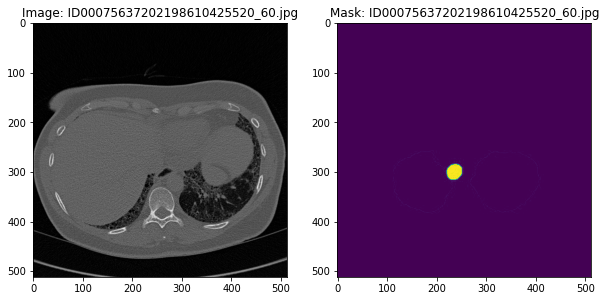

In [20]:
show_random(ALL_IMAGES, ALL_MASKS)

In [21]:
from typing import List

from torch.utils.data import Dataset


class SegmentationDataset(Dataset):
    def __init__(
        self,
        images: List[Path],
        masks: List[Path] = None,
        transforms=None
    ) -> None:
        self.images = images
        self.masks = masks
        self.transforms = transforms

    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> dict:
        image_path = self.images[idx]
        image = utils.imread(image_path)
        
        result = {"image": image}
        
        if self.masks is not None:
            mask = utils.imread(self.masks[idx])[:,:,0]
            result["mask"] = mask
        
        if self.transforms is not None:
            result = self.transforms(**result)
        
        result["filename"] = image_path.name

        return result

## Albumentation

In [22]:
import albumentations as albu
from albumentations.pytorch import ToTensor


def pre_transforms(image_size=224):
    return [albu.Resize(image_size, image_size, p=1)]


def hard_transforms():
    result = [
      albu.RandomRotate90(),
      albu.Cutout(),
      albu.RandomBrightnessContrast(
          brightness_limit=0.2, contrast_limit=0.2, p=0.3
      ),
      albu.GridDistortion(p=0.3),
      albu.HueSaturationValue(p=0.3)
    ]

    return result
  

def resize_transforms(image_size=224):
    BORDER_CONSTANT = 0
    pre_size = int(image_size * 1.5)

    random_crop = albu.Compose([
      albu.SmallestMaxSize(pre_size, p=1),
      albu.RandomCrop(
          image_size, image_size, p=1
      )

    ])

    rescale = albu.Compose([albu.Resize(image_size, image_size, p=1)])

    random_crop_big = albu.Compose([
      albu.LongestMaxSize(pre_size, p=1),
      albu.RandomCrop(
          image_size, image_size, p=1
      )

    ])

    # Converts the image to a square of size image_size x image_size
    result = [
      albu.OneOf([
          random_crop,
          rescale,
          random_crop_big
      ], p=1)
    ]

    return result
  
def post_transforms():
    # we use ImageNet image normalization
    # and convert it to torch.Tensor
    return [albu.Normalize(), ToTensor()]
  
def compose(transforms_to_compose):
    # combine all augmentations into single pipeline
    result = albu.Compose([
      item for sublist in transforms_to_compose for item in sublist
    ])
    return result

In [23]:
train_transforms = compose([
    resize_transforms(), 
    hard_transforms(), 
    post_transforms()
])
valid_transforms = compose([pre_transforms(), post_transforms()])

show_transforms = compose([resize_transforms(), hard_transforms()])

images/images/ID00015637202177877247924_287.jpg
masks/masks/ID00015637202177877247924_mask_287.jpg


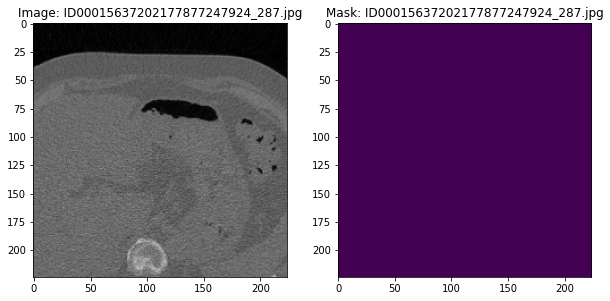

In [24]:
show_random(ALL_IMAGES, ALL_MASKS, transforms=show_transforms)

## Loaders

In [25]:
import collections
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader

def get_loaders(
    images: List[Path],
    masks: List[Path],
    random_state: int,
    valid_size: float = 0.2,
    batch_size: int = 32,
    num_workers: int = 4,
    train_transforms_fn = None,
    valid_transforms_fn = None,
) -> dict:

    indices = np.arange(len(images))

    # Let's divide the data set into train and valid parts.
    train_indices, valid_indices = train_test_split(
      indices, test_size=valid_size, random_state=random_state, shuffle=True
    )

    np_images = np.array(images)
    np_masks = np.array(masks)

    # Creates our train dataset
    train_dataset = SegmentationDataset(
      images = np_images[train_indices].tolist(),
      masks = np_masks[train_indices].tolist(),
      transforms = train_transforms_fn
    )

    # Creates our valid dataset
    valid_dataset = SegmentationDataset(
      images = np_images[valid_indices].tolist(),
      masks = np_masks[valid_indices].tolist(),
      transforms = valid_transforms_fn
    )

    # Catalyst uses normal torch.data.DataLoader
    train_loader = DataLoader(
      train_dataset,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      drop_last=True,
    )

    valid_loader = DataLoader(
      valid_dataset,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      drop_last=True,
    )

    # And excpect to get an OrderedDict of loaders
    loaders = collections.OrderedDict()
    loaders["train"] = train_loader
    loaders["valid"] = valid_loader

    return loaders

In [26]:
if is_fp16_used:
    batch_size = 64
else:
    batch_size = 32

print(f"batch_size: {batch_size}")

loaders = get_loaders(
    images=ALL_IMAGES,
    masks=ALL_MASKS,
    random_state=SEED,
    train_transforms_fn=train_transforms,
    valid_transforms_fn=valid_transforms,
    batch_size=batch_size
)

batch_size: 32


## Experiment

### Model

In [27]:
import segmentation_models_pytorch as smp

# We will use Feature Pyramid Network with pre-trained ResNeXt50 backbone
model = smp.FPN(encoder_name="resnext50_32x4d", classes=1)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


### Model training

In [36]:
from torch import nn

from catalyst.contrib.nn import DiceLoss, IoULoss

# we have multiple criterions
criterion = {
    "dice": DiceLoss(),
    "iou": IoULoss(),
    "bce": nn.BCEWithLogitsLoss(),
    "sum_bndry": SumBdryLoss(),
    "sym_bndry": SymBdryLoss(),
    "bndry": BdryLoss()
}

In [37]:
from torch import optim

from catalyst.contrib.nn import RAdam, Lookahead

learning_rate = 0.001
encoder_learning_rate = 0.0005

# Since we use a pre-trained encoder, we will reduce the learning rate on it.
layerwise_params = {"encoder*": dict(lr=encoder_learning_rate, weight_decay=0.00003)}

# This function removes weight_decay for biases and applies our layerwise_params
model_params = utils.process_model_params(model, layerwise_params=layerwise_params)

# Catalyst has new SOTA optimizers out of box
base_optimizer = RAdam(model_params, lr=learning_rate, weight_decay=0.0003)
optimizer = Lookahead(base_optimizer)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.25, patience=2)

In [38]:
from catalyst.callbacks import MetricCallback

In [39]:
from catalyst.dl import SupervisedRunner

num_epochs = 3
logdir = "./logs/segmentation"

device = utils.get_device()
print(f"device: {device}")

if is_fp16_used:
    fp16_params = dict(opt_level="O1") # params for FP16
else:
    fp16_params = None

print(f"FP16 params: {fp16_params}")


# by default SupervisedRunner uses "features" and "targets",
# in our case we get "image" and "mask" keys in dataset __getitem__
runner = SupervisedRunner(device=device, input_key="image", input_target_key="mask")

device: cuda
FP16 params: None


### Running train-loop

In [40]:
from catalyst.dl import DiceCallback, IouCallback, \
  CriterionCallback, MetricAggregationCallback
from catalyst.contrib.callbacks import DrawMasksCallback

callbacks = [
    # Each criterion is calculated separately.
    CriterionCallback(
        input_key="mask",
        prefix="loss_dice",
        criterion_key="dice"
    ),
    CriterionCallback(
        input_key="mask",
        prefix="loss_iou",
        criterion_key="iou"
    ),
    CriterionCallback(
        input_key="mask",
        prefix="loss_bce",
        criterion_key="bce"
    ),
    CriterionCallback(
        input_key="mask",
        prefix="loss_sum_bndry",
        criterion_key="sum_bndry"
    ),
    CriterionCallback(
        input_key="mask",
        prefix="loss_sym_bndry",
        criterion_key="sym_bndry"
    ),
    CriterionCallback(
        input_key="mask",
        prefix="loss_bndry",
        criterion_key="bndry"
    ),

    # And only then we aggregate everything into one loss.
    MetricAggregationCallback(
        prefix="loss",
        mode="weighted_sum", # can be "sum", "weighted_sum" or "mean"
        # because we want weighted sum, we need to add scale for each loss
        metrics={"loss_dice": 0.1, "loss_iou": 0.0, "loss_bce": 0.0, "loss_bndry": 1.0, "loss_sum_bndry": 0.0, "loss_sum_bndry": 0.0},
    ),

    # metrics
    DiceCallback(input_key="mask", threshold=0.5),
    IouCallback(input_key="mask", threshold=0.5),
    # visualization
    DrawMasksCallback(output_key='logits',
                      input_image_key='image',
                      input_mask_key='mask',
                      summary_step=50
    )
]

runner.train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    # our dataloaders
    loaders=loaders,
    # We can specify the callbacks list for the experiment;
    callbacks=callbacks,
    # path to save logs
    logdir=logdir,
    num_epochs=num_epochs,
    # save our best checkpoint by IoU metric
    main_metric="iou",
    # IoU needs to be maximized.
    minimize_metric=False,
    # for FP16. It uses the variable from the very first cell
    fp16=fp16_params,
    # prints train logs
    verbose=True,
)

1/3 * Epoch (train): 100% 417/417 [12:10<00:00,  1.75s/it, dice=0.413, iou=0.260, loss=0.082, loss_bce=0.074, loss_bndry=0.023, loss_dice=0.591, loss_iou=0.743, loss_sum_bndry=0.844, loss_sym_bndry=0.821]
1/3 * Epoch (valid): 100% 104/104 [02:23<00:00,  1.38s/it, dice=0.663, iou=0.495, loss=0.037, loss_bce=0.013, loss_bndry=0.003, loss_dice=0.341, loss_iou=0.509, loss_sum_bndry=0.155, loss_sym_bndry=0.152]
[2021-01-31 15:38:52,453] 
1/3 * Epoch 1 (_base): lr=0.0005 | momentum=0.9000
1/3 * Epoch 1 (train): dice=0.5604 | iou=0.4005 | loss=0.0873 | loss_bce=0.0510 | loss_bndry=0.0431 | loss_dice=0.4420 | loss_iou=0.6021 | loss_sum_bndry=0.5043 | loss_sym_bndry=0.4612
1/3 * Epoch 1 (valid): dice=0.5697 | iou=0.4072 | loss=0.0578 | loss_bce=0.0266 | loss_bndry=0.0144 | loss_dice=0.4341 | loss_iou=0.5967 | loss_sum_bndry=0.2615 | loss_sym_bndry=0.2471


INFO:metrics_logger:
1/3 * Epoch 1 (_base): lr=0.0005 | momentum=0.9000
1/3 * Epoch 1 (train): dice=0.5604 | iou=0.4005 | loss=0.0873 | loss_bce=0.0510 | loss_bndry=0.0431 | loss_dice=0.4420 | loss_iou=0.6021 | loss_sum_bndry=0.5043 | loss_sym_bndry=0.4612
1/3 * Epoch 1 (valid): dice=0.5697 | iou=0.4072 | loss=0.0578 | loss_bce=0.0266 | loss_bndry=0.0144 | loss_dice=0.4341 | loss_iou=0.5967 | loss_sum_bndry=0.2615 | loss_sym_bndry=0.2471


2/3 * Epoch (train): 100% 417/417 [12:20<00:00,  1.78s/it, dice=0.393, iou=0.245, loss=0.136, loss_bce=0.076, loss_bndry=0.076, loss_dice=0.606, loss_iou=0.754, loss_sum_bndry=0.600, loss_sym_bndry=0.525]
2/3 * Epoch (valid): 100% 104/104 [02:22<00:00,  1.37s/it, dice=0.321, iou=0.191, loss=0.073, loss_bce=0.020, loss_bndry=0.005, loss_dice=0.675, loss_iou=0.806, loss_sum_bndry=0.355, loss_sym_bndry=0.350]
[2021-01-31 15:53:47,053] 
2/3 * Epoch 2 (_base): lr=0.0005 | momentum=0.9000
2/3 * Epoch 2 (train): dice=0.5531 | iou=0.3938 | loss=0.0880 | loss_bce=0.0537 | loss_bndry=0.0431 | loss_dice=0.4495 | loss_iou=0.6089 | loss_sum_bndry=0.5356 | loss_sym_bndry=0.4926
2/3 * Epoch 2 (valid): dice=0.3892 | iou=0.2499 | loss=0.0790 | loss_bce=0.0378 | loss_bndry=0.0178 | loss_dice=0.6121 | loss_iou=0.7513 | loss_sum_bndry=0.4692 | loss_sym_bndry=0.4514


INFO:metrics_logger:
2/3 * Epoch 2 (_base): lr=0.0005 | momentum=0.9000
2/3 * Epoch 2 (train): dice=0.5531 | iou=0.3938 | loss=0.0880 | loss_bce=0.0537 | loss_bndry=0.0431 | loss_dice=0.4495 | loss_iou=0.6089 | loss_sum_bndry=0.5356 | loss_sym_bndry=0.4926
2/3 * Epoch 2 (valid): dice=0.3892 | iou=0.2499 | loss=0.0790 | loss_bce=0.0378 | loss_bndry=0.0178 | loss_dice=0.6121 | loss_iou=0.7513 | loss_sum_bndry=0.4692 | loss_sym_bndry=0.4514


3/3 * Epoch (train): 100% 417/417 [12:22<00:00,  1.78s/it, dice=0.586, iou=0.414, loss=0.052, loss_bce=0.044, loss_bndry=0.010, loss_dice=0.415, loss_iou=0.587, loss_sum_bndry=0.423, loss_sym_bndry=0.413]
3/3 * Epoch (valid): 100% 104/104 [02:24<00:00,  1.39s/it, dice=0.642, iou=0.473, loss=0.039, loss_bce=0.014, loss_bndry=0.003, loss_dice=0.362, loss_iou=0.532, loss_sum_bndry=0.155, loss_sym_bndry=0.152]
[2021-01-31 16:08:38,027] 
3/3 * Epoch 3 (_base): lr=0.0005 | momentum=0.9000
3/3 * Epoch 3 (train): dice=0.4994 | iou=0.3428 | loss=0.0930 | loss_bce=0.0581 | loss_bndry=0.0427 | loss_dice=0.5026 | loss_iou=0.6591 | loss_sum_bndry=0.5999 | loss_sym_bndry=0.5571
3/3 * Epoch 3 (valid): dice=0.5484 | iou=0.3868 | loss=0.0613 | loss_bce=0.0327 | loss_bndry=0.0159 | loss_dice=0.4542 | loss_iou=0.6159 | loss_sum_bndry=0.2610 | loss_sym_bndry=0.2452


INFO:metrics_logger:
3/3 * Epoch 3 (_base): lr=0.0005 | momentum=0.9000
3/3 * Epoch 3 (train): dice=0.4994 | iou=0.3428 | loss=0.0930 | loss_bce=0.0581 | loss_bndry=0.0427 | loss_dice=0.5026 | loss_iou=0.6591 | loss_sum_bndry=0.5999 | loss_sym_bndry=0.5571
3/3 * Epoch 3 (valid): dice=0.5484 | iou=0.3868 | loss=0.0613 | loss_bce=0.0327 | loss_bndry=0.0159 | loss_dice=0.4542 | loss_iou=0.6159 | loss_sum_bndry=0.2610 | loss_sym_bndry=0.2452


Top best models:
logs/segmentation/checkpoints/train.1.pth	0.4072


## Model inference

In [32]:
TEST_IMAGES = sorted(test_image_path.glob("*.jpg"))[20:30]

# create test dataset
test_dataset = SegmentationDataset(
    TEST_IMAGES, 
    transforms=valid_transforms
)

num_workers: int = 4

infer_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers
)

# this get predictions for the whole loader
predictions = np.vstack(list(map(
    lambda x: x["logits"].cpu().numpy(), 
    runner.predict_loader(loader=infer_loader, resume=f"{logdir}/checkpoints/best.pth")
)))

print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(10, 1, 224, 224)


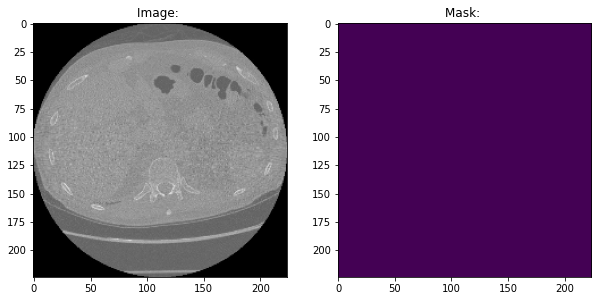

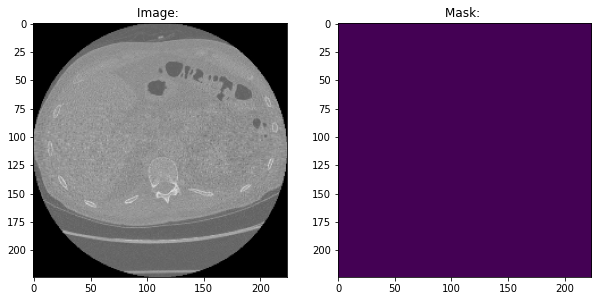

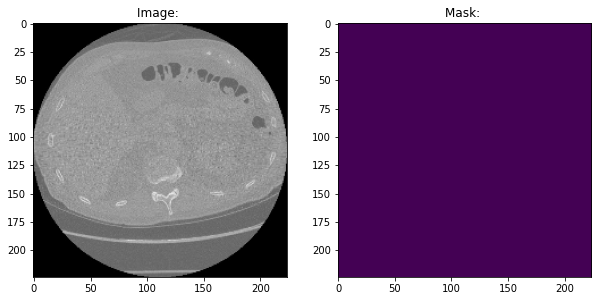

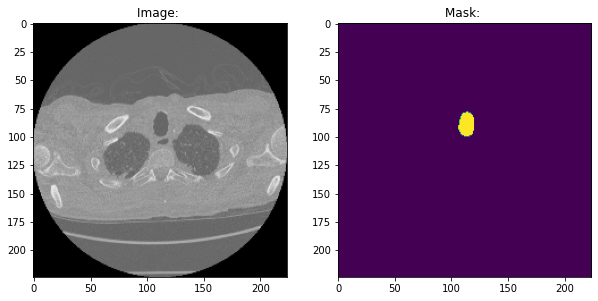

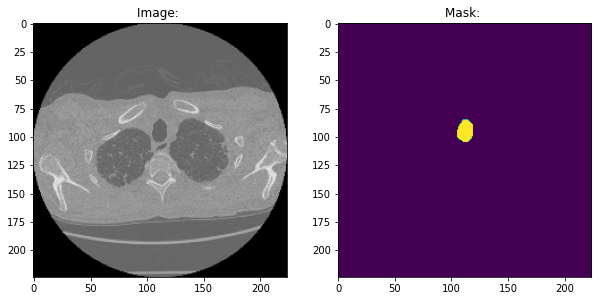

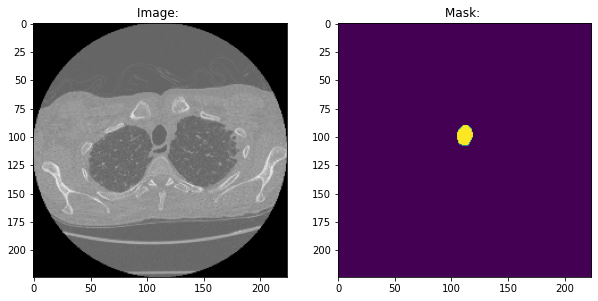

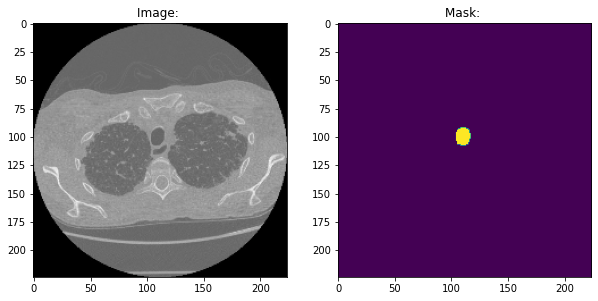

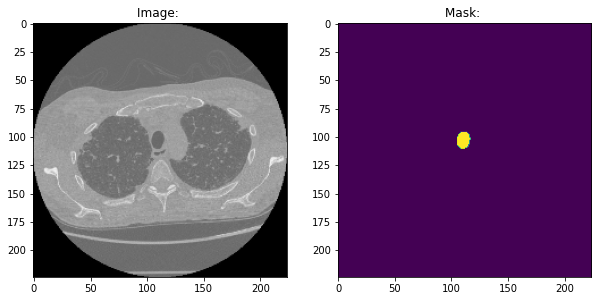

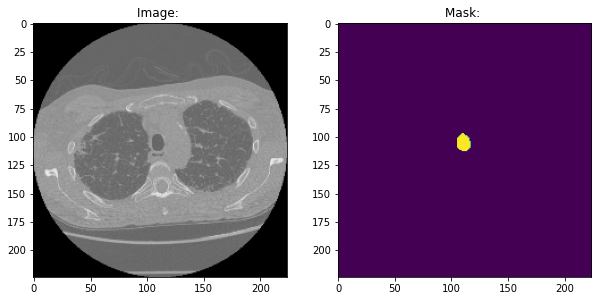

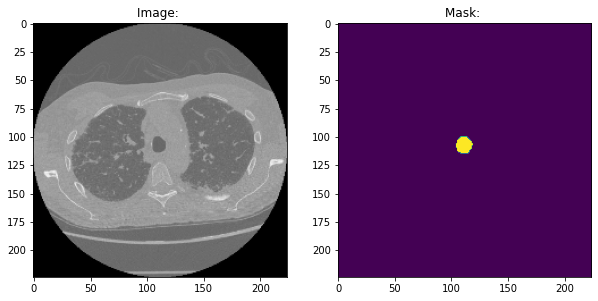

In [33]:
threshold = 0.5
max_count = 10

for i, (features, logits) in enumerate(zip(test_dataset, predictions)):
    image = utils.tensor_to_ndimage(features["image"])

    mask_ = torch.from_numpy(logits[0]).sigmoid()
    mask = utils.detach(mask_ > threshold).astype("float")
        
    show_examples(name="", image=image, mask=mask)
    
    if i >= max_count:
        break